In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading datasets
df = pd.read_csv("survey_results_public.csv")
schema = pd.read_csv('./survey_results_schema.csv')


In [3]:

   # Questions:
   #1. In which countries professional developers earn the most?
   #2. Does formal education have an impact on the Salary of a profesional developer?
   #3. Is programming still a male-dominated field? Does Gender affect the Salary?

In [4]:
#let's create a list of columns in order to investigate which ones can help us to answer the questions
columns = list(df.columns)


In [5]:
#let's get to know the data further with a function which will allow us to view a survey question related to a column
def get_description(column_name, schema=schema):
   
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc


In [6]:
get_description('Gender')

'Which of the following do you currently identify as?'

In [7]:
#trimming the data to include only the countries that appear a considerable number of times and to include only professional developers
df = df[df['Professional'] == 'Professional developer']
df1 = df[df.groupby('Country').Country.transform(len) > 50] 

In [8]:
#first question 

In [9]:
#grouping the necessary data

mean_salary_per_country = df1[['Country' , 'Salary']].groupby('Country' , as_index=False)['Salary'].mean()

In [10]:
#dropping missing values in this case is justified, as we've got a sample large enough to use it
mean_salary_per_country = mean_salary_per_country.dropna() 

mean_salary_per_country

In [11]:
#testing the results so far

print(mean_salary_per_country)

                 Country        Salary
0              Argentina  25771.287719
1              Australia  69215.755208
2                Austria  45299.012856
3             Bangladesh  21923.787850
4                Belarus  23168.115845
..                   ...           ...
60  United Arab Emirates  29166.269328
61        United Kingdom  52602.396967
62         United States  96194.754635
63               Uruguay  44224.203822
64               Vietnam  13183.333333

[65 rows x 2 columns]


In [12]:
#sorting the results by Salary

mean_salary_per_country.sort_values(by=['Salary'], inplace=True, ascending=False)

In [13]:
print(mean_salary_per_country) 

          Country        Salary
62  United States  96194.754635
55    Switzerland  91189.692616
39         Norway  73534.353022
1       Australia  69215.755208
27         Israel  62685.768457
..            ...           ...
24      Indonesia   8713.222258
40       Pakistan   8195.250180
38        Nigeria   8181.251822
35          Nepal   7608.333333
15          Egypt   6116.166667

[65 rows x 2 columns]


In [14]:
#re-indexing the data 

mean_salary_per_country = mean_salary_per_country.reset_index(drop=True)

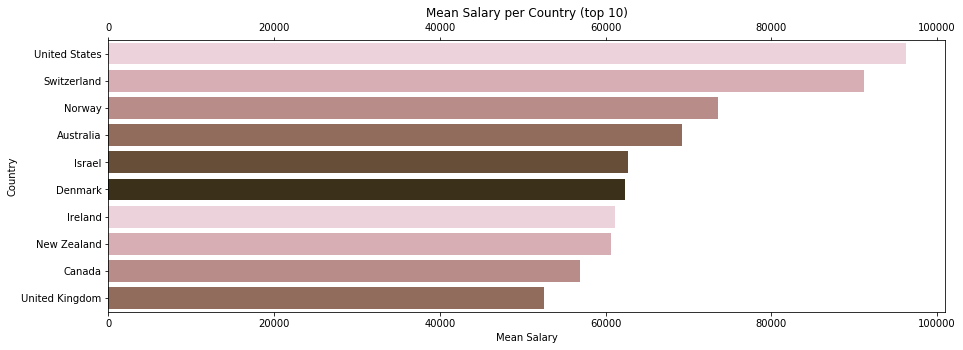

In [15]:
#Creating a plot and placing labels both at the top and at the bottom of it to make it more readable

plt.figure(figsize=(15, 5))
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
sns.barplot(data=mean_salary_per_country.head(10), x='Salary', y='Country', palette=sns.color_palette("ch:4.5,-.3,dark=.2"))
plt.title('Mean Salary per Country (top 10)')
plt.ylabel('Country')
plt.xlabel('Mean Salary')
plt.show()


In [16]:
#Let's now focus on the impact of education on the salary
mean_salary_per_education = df[['FormalEducation' , 'Salary']].dropna().groupby('FormalEducation' , as_index=False)['Salary'].mean()

In [17]:
mean_salary_per_education['FormalEducation'] = mean_salary_per_education['FormalEducation'].replace(["Some college/university study without earning a bachelor's degree"],'Higher education started, not completed')

mean_salary_per_education.sort_values(by=['Salary'], inplace=True, ascending=False)


In [18]:
print(mean_salary_per_education)

                           FormalEducation        Salary
1                          Doctoral degree  78527.933053
5                Primary/elementary school  62677.337356
4                          Master's degree  58250.838766
0                        Bachelor's degree  56914.358553
8  Higher education started, not completed  55912.810459
2   I never completed any formal education  44430.660621
7                         Secondary school  40395.148419
6                      Professional degree  39503.658863
3                   I prefer not to answer  38284.836141


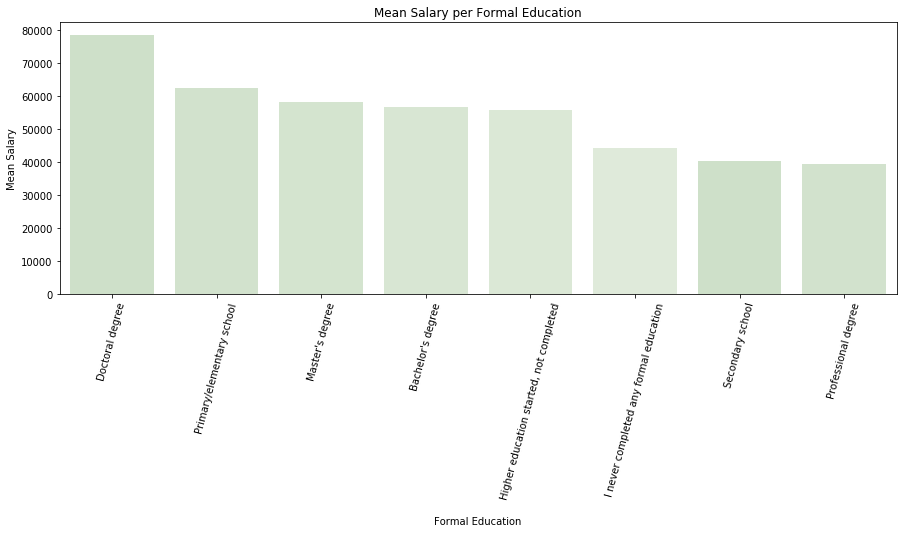

In [19]:
plt.figure(figsize=(15, 5))
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.xticks(rotation='75' , va='top')
sns.barplot(data=mean_salary_per_education.drop(3), x='FormalEducation', y='Salary', palette=sns.color_palette("ch:2.6,-.3,dark=.9"))
plt.title('Mean Salary per Formal Education')
plt.ylabel('Mean Salary')
plt.xlabel('\nFormal Education')
plt.show()


In [20]:
#place of living has a higher impact on Salary than formal education

mean_salary_per_country
mean_salary_per_education


,FormalEducation,Salary
1,Doctoral degree,78527.933053
5,Primary/elementary school,62677.337356
4,Master's degree,58250.838766
0,Bachelor's degree,56914.358553
8,"Higher education started, not completed",55912.810459
2,I never completed any formal education,44430.660621
7,Secondary school,40395.148419
6,Professional degree,39503.658863
3,I prefer not to answer,38284.836141


In [21]:
#gender of professional developers
gender = df['Gender'].dropna()

In [22]:
#mean salary per gender
mean_salary_per_gender = df[['Gender' , 'Salary']].dropna().groupby('Gender' , as_index=False)['Salary'].mean()


In [23]:
mean_salary_per_gender

,Gender,Salary
0,Female,58083.924534
1,Female; Gender non-conforming,69519.757125
2,Female; Transgender,78791.988363
3,Female; Transgender; Gender non-conforming,90750.000000
4,Female; Transgender; Other,126000.000000
5,Gender non-conforming,63672.172798
6,Male,56996.494293
7,Male; Female,23867.997408
8,Male; Female; Other,15000.000000
9,Male; Female; Transgender,12000.000000


In [24]:
# % of respondants for each gender
percentage = gender.dropna().value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

In [25]:
percentage

Male                                                       90.95%
Female                                                      7.05%
Other                                                       0.48%
Male; Other                                                 0.45%
Gender non-conforming                                       0.34%
Male; Gender non-conforming                                 0.17%
Transgender                                                 0.13%
Female; Transgender                                         0.12%
Female; Gender non-conforming                               0.08%
Male; Female                                                0.05%
Male; Female; Transgender; Gender non-conforming; Other     0.04%
Transgender; Gender non-conforming                          0.03%
Male; Transgender                                           0.02%
Female; Transgender; Gender non-conforming                  0.02%
Male; Female; Transgender; Gender non-conforming            0.02%
Male; Tran

In [26]:
def gender_male_or_not_male(value):
    '''
    input: values from the Gender column
    output: percentage of male, female and other identities
    '''

    if value == 'Male':
        return 'Male'
    elif value == 'Female':
        return 'Female'
    else:
        return 'other'

gender1 = gender.dropna().apply(gender_male_or_not_male)

gender1 = gender1.value_counts(normalize=True).mul(100).round(2)

gender1

Male      90.95
Female     7.05
other      2.00
Name: Gender, dtype: float64

([<matplotlib.patches.Wedge at 0x275203c0108>,
 [Text(-1.0558396342281502, 0.30854929394339287, 'Male'),
  Text(1.0343821402546816, -0.37423734169928097, 'Female'),
  Text(1.0978293771176832, -0.0690699553887226, 'Other')])

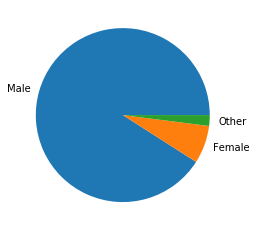

In [27]:
labels = 'Male' , 'Female' , 'Other'
plt.pie(gender1, labels = labels)



In [50]:
female = df[df.Gender == 'Female']
female = female[['Gender' , 'Salary']].dropna().mean()
other = df[df.Gender != 'Male']
other = other[other.Gender != 'Female']
male = df[df.Gender == 'Male']
other = other[['Gender' , 'Salary']].dropna().mean()
male = male[['Gender' , 'Salary']].dropna().mean()

In [51]:
#mean salary of developers who don't identify only as male or female
other


Salary    61671.656678
dtype: float64

In [52]:
#mean salary of male developers
male

Salary    56996.494293
dtype: float64

In [53]:
#mean salary of female developers
female

Salary    58083.924534
dtype: float64

In [62]:
#merging the male, female and other into one dataframe
salary_male_vs_other = pd.concat([male , female, other] , ignore_index = False , axis=1)

#rounding the values to two decimals


salary_male_vs_other = salary_male_vs_other.round(decimals=2)


In [63]:
salary_male_vs_other.columns = ['male' , 'female' , 'other']

In [64]:
salary_male_vs_other

,male,female,other
Salary,56996.49,58083.92,61671.66
